In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Bologna_clean.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/42196,50 sm Studio in the historic centre,The studio is a fully restored ancient basemen...,No se proporcionan detalles,https://a0.muscache.com/pictures/4775726/68044...,Carlo,2010-07-29,within an hour,100%,f,...,4.65,4.92,4.88,4.87,4.66,2.0,2.0,0.0,0.0,1.37
1,https://www.airbnb.com/rooms/46352,A room in Pasolini's house,"Simple, cozy and silent room in a lived house ...",In the very nearby you have Via Saragozza and ...,https://a0.muscache.com/pictures/9f94acc3-98fc...,Eleonora,2011-03-28,a few days or more,44%,f,...,4.60,4.83,4.85,4.84,4.67,2.0,0.0,2.0,0.0,2.57
2,https://www.airbnb.com/rooms/85368,Garden House Bologna,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/585815/331d45...,Anna Maria,2011-03-28,Desconocido,-%,f,...,4.83,4.98,4.98,4.80,4.81,1.0,1.0,0.0,0.0,0.39
3,https://www.airbnb.com/rooms/204553,Private Room & Bath Ex-Convent in Centro Storico,The neighbourhood is the most prestigious of B...,"Safest, most central, quietest street in Bolog...",https://a0.muscache.com/pictures/36151297/8be9...,Elizabeth,2011-05-09,within an hour,100%,f,...,4.92,4.94,4.93,4.97,4.86,1.0,0.0,1.0,0.0,1.68
4,https://www.airbnb.com/rooms/219878,Gorgeous Haven in Centro Storico,"Quiet, bright, fully equipped 800 square feet ...","has many shops, cafes, wine bars, restaurants ...",https://a0.muscache.com/pictures/f16e5b7e-68b3...,Elisa,2011-09-10,within a few hours,100%,t,...,4.95,4.90,4.92,4.84,4.78,2.0,2.0,0.0,0.0,1.09


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,100%,f,t,Entire rental unit,Entire home/apt,t,2.0,1.0,80.0,4.65
1,44%,f,t,Private room in rental unit,Private room,f,2.0,1.0,43.0,4.60
2,-%,f,t,Entire rental unit,Entire home/apt,f,5.0,1.0,120.0,4.83
3,100%,f,t,Private room in rental unit,Private room,f,2.0,1.0,92.0,4.92
4,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,147.0,4.95
...,...,...,...,...,...,...,...,...,...,...
4838,100%,f,f,Private room in home,Private room,f,2.0,1.0,70.0,5.00
4839,100%,f,t,Entire rental unit,Entire home/apt,f,5.0,1.0,254.0,5.00
4840,-%,f,f,Entire rental unit,Entire home/apt,t,4.0,1.0,84.0,5.00
4841,100%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,100.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#f1['property_type'] = encoder.fit_transform(f1['property_type'])
#f1['property_type'] = f1['property_type'].astype(float)

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\pplcf\AppData\Local\Temp\ipykernel_16996\1986825469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\pplcf\AppData\Local\Temp\ipykernel_16996\1986825469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\pplcf\AppData\Local\Temp\ipykernel_16996\1986825469.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Shared room
f2= f1[(f1["room_type"] == 4)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 69 to 1370
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         6 non-null      float64
 1   host_is_superhost          6 non-null      int64  
 2   host_identity_verified     6 non-null      int64  
 3   property_type              6 non-null      int64  
 4   room_type                  6 non-null      int64  
 5   instant_bookable           6 non-null      int64  
 6   accommodates               6 non-null      float64
 7   bathrooms                  6 non-null      float64
 8   price                      6 non-null      float64
 9   review_scores_cleanliness  6 non-null      float64
dtypes: float64(5), int64(5)
memory usage: 528.0 bytes


<Axes: xlabel='room_type', ylabel='price'>

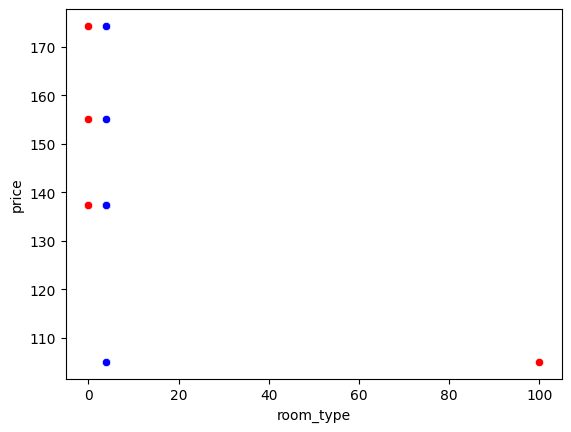

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

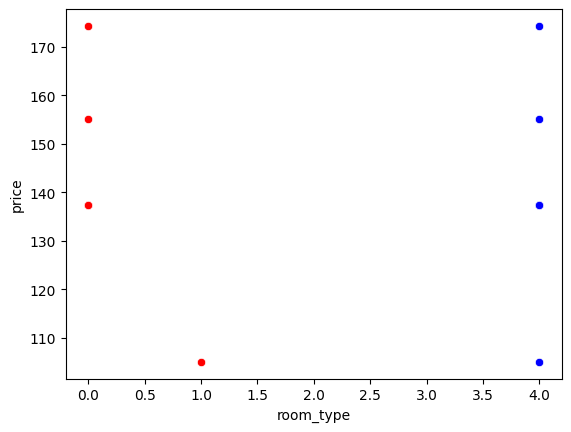

In [8]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

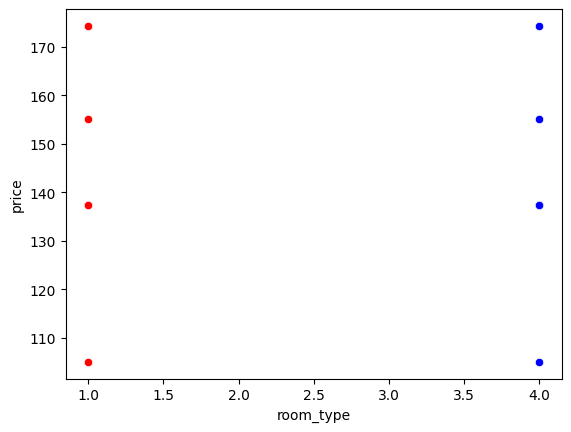

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

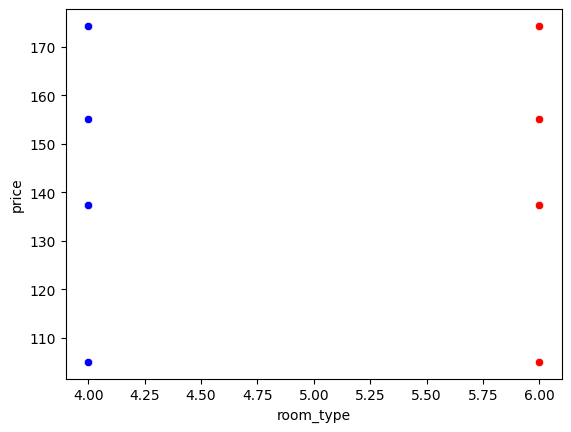

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

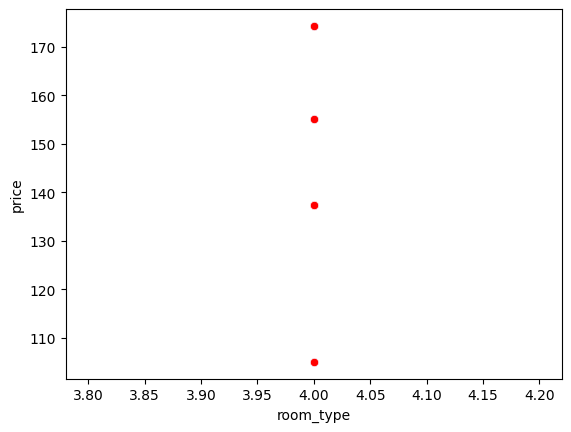

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

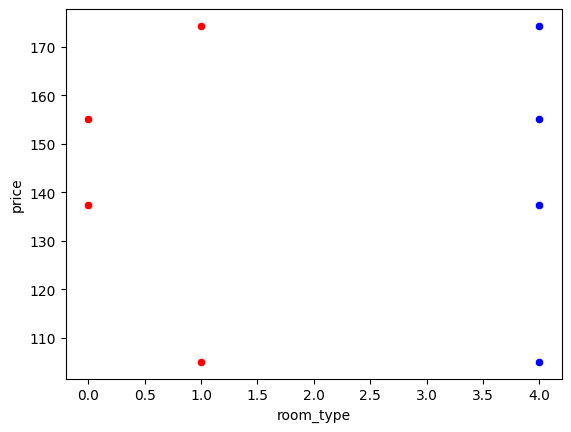

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

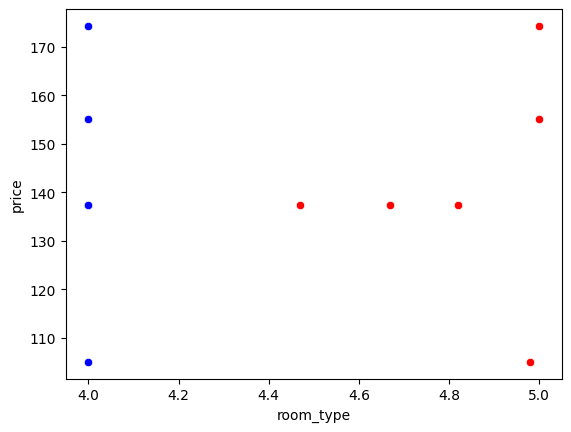

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

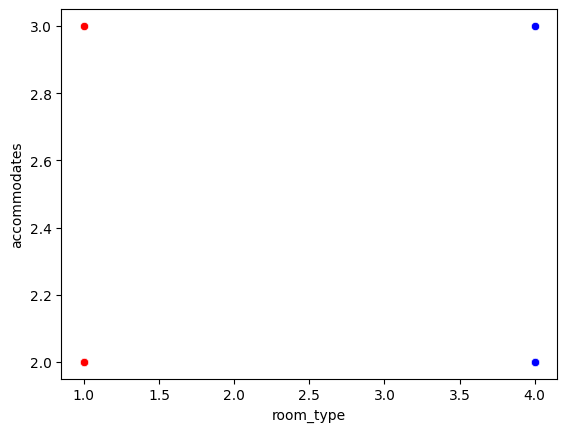

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.433]),
 'rank_': 1,
 'singular_': array([91.28709292]),
 'intercept_': np.float64(148.3)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-43.3]),
 'rank_': 1,
 'singular_': array([0.91287093]),
 'intercept_': np.float64(148.3)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(141.08333333333334)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(141.08333333333334)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(141.08333333333334)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.15]),
 'rank_': 1,
 'singular_': array([1.15470054]),
 'intercept_': np.float64(141.8)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([19.34419263]),
 'rank_': 1,
 'singular_': array([0.48511167]),
 'intercept_': np.float64(47.77984419263511)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2.1666666666666665)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([148.3, 105. , 148.3, 148.3, 148.3, 148.3])

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([148.3, 105. , 148.3, 148.3, 148.3, 148.3])

**Modelo matemático y=0x + 11247.1754189944133**

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([141.08333333, 141.08333333, 141.08333333, 141.08333333,
       141.08333333, 141.08333333])

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([141.08333333, 141.08333333, 141.08333333, 141.08333333,
       141.08333333, 141.08333333])

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([141.08333333, 141.08333333, 141.08333333, 141.08333333,
       141.08333333, 141.08333333])

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([139.65, 139.65, 141.8 , 141.8 , 141.8 , 141.8 ])

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([144.50080737, 144.11392351, 141.01885269, 138.1172238 ,
       134.24838527, 144.50080737])

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.16666667, 2.16666667, 2.16666667, 2.16666667, 2.16666667,
       2.16666667])

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,141.083333,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,141.083333,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,141.083333,141.083333,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,141.083333,141.083333,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,141.083333,141.083333,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,141.083333,141.083333,139.65,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,141.083333,141.083333,139.65,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,141.083333,141.083333,141.80,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,141.083333,141.083333,141.80,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,141.083333,141.083333,141.80,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,141.083333,141.083333,141.80,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,141.083333,141.083333,139.65,144.500807,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,141.083333,141.083333,139.65,144.113924,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,141.083333,141.083333,141.80,141.018853,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,141.083333,141.083333,141.80,138.117224,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,141.083333,141.083333,141.80,134.248385,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,141.083333,141.083333,141.80,144.500807,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
69,148.3,148.3,141.083333,141.083333,141.083333,139.65,144.500807,2.166667,0.0,0,1,6,4,1,2.0,1.0,174.3,5.00
669,105.0,105.0,141.083333,141.083333,141.083333,139.65,144.113924,2.166667,100.0,1,1,6,4,1,3.0,1.0,105.0,4.98
1228,148.3,148.3,141.083333,141.083333,141.083333,141.80,141.018853,2.166667,0.0,0,1,6,4,0,2.0,1.0,137.4,4.82
1229,148.3,148.3,141.083333,141.083333,141.083333,141.80,138.117224,2.166667,0.0,0,1,6,4,0,2.0,1.0,137.4,4.67
1238,148.3,148.3,141.083333,141.083333,141.083333,141.80,134.248385,2.166667,0.0,0,1,6,4,0,2.0,1.0,137.4,4.47
1370,148.3,148.3,141.083333,141.083333,141.083333,141.80,144.500807,2.166667,0.0,0,1,6,4,0,2.0,1.0,155.0,5.00


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

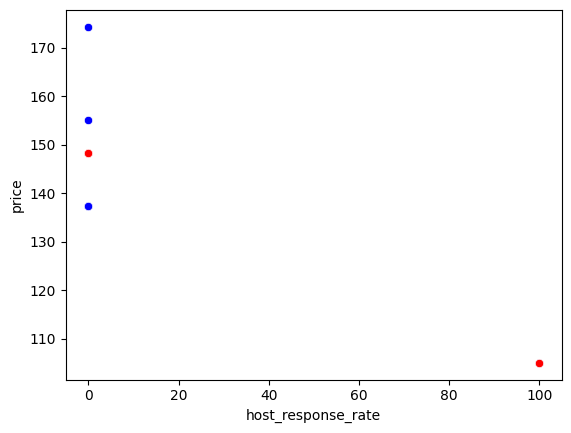

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

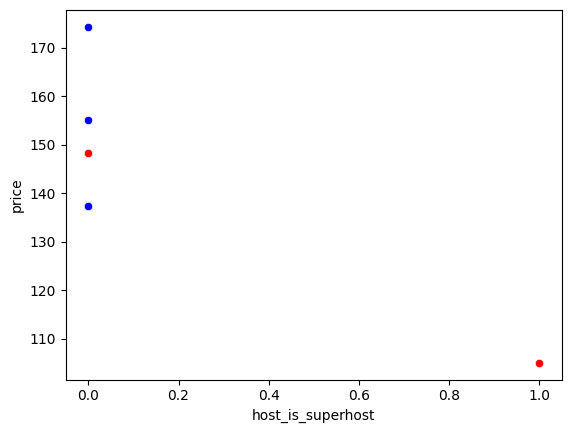

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

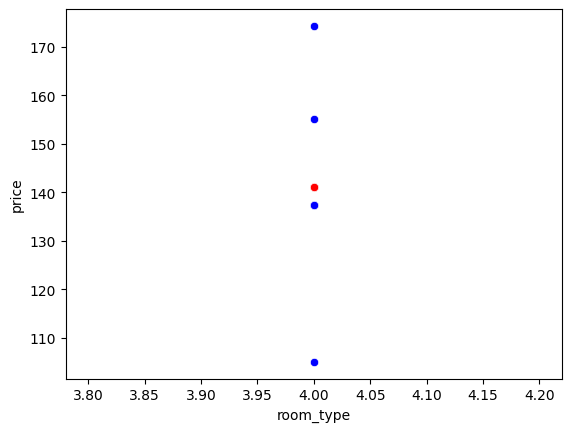

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

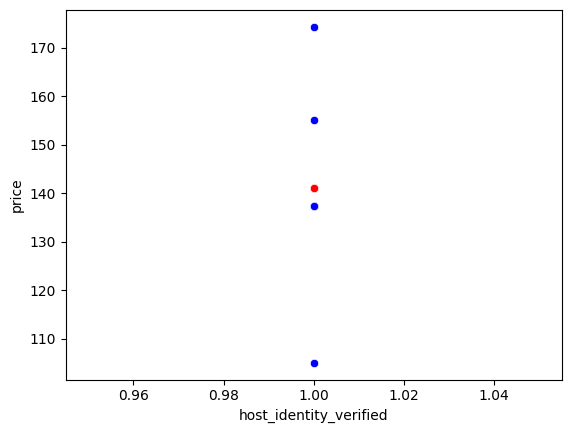

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

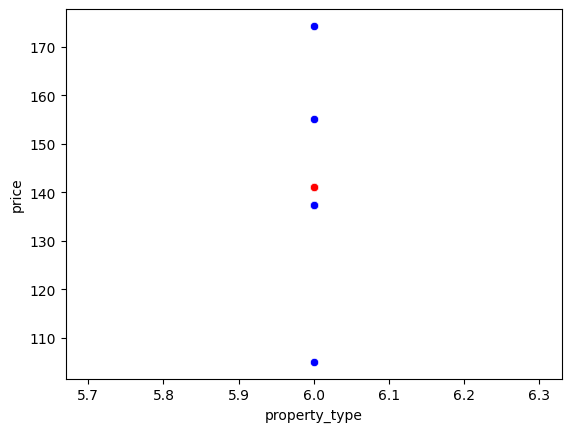

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

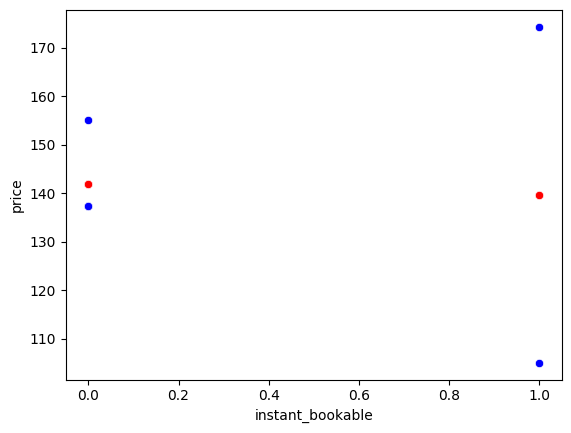

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

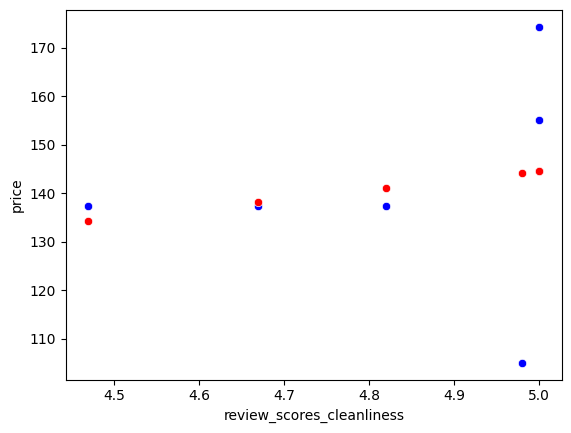

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

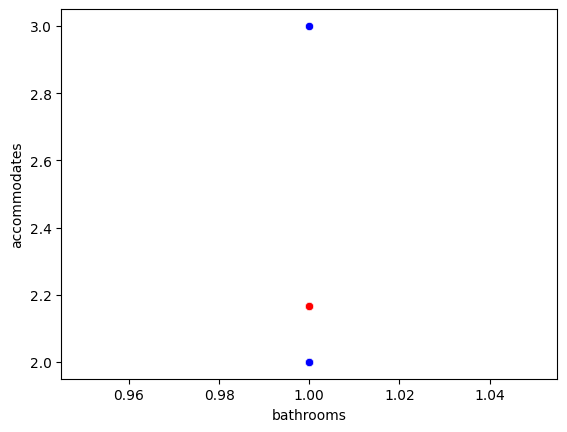

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.5918822454583393

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.5918822454583393

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.0

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.002334836223676695

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.03335995292573557

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.0

**COEFICIENTES DE CORRELACIÓN**

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7693388365722474)

In [61]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.7693388365722474)

In [62]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.7693388365722474)

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [64]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.0)

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.04832014304280043)

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.18264707204260233)

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0)

In [68]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

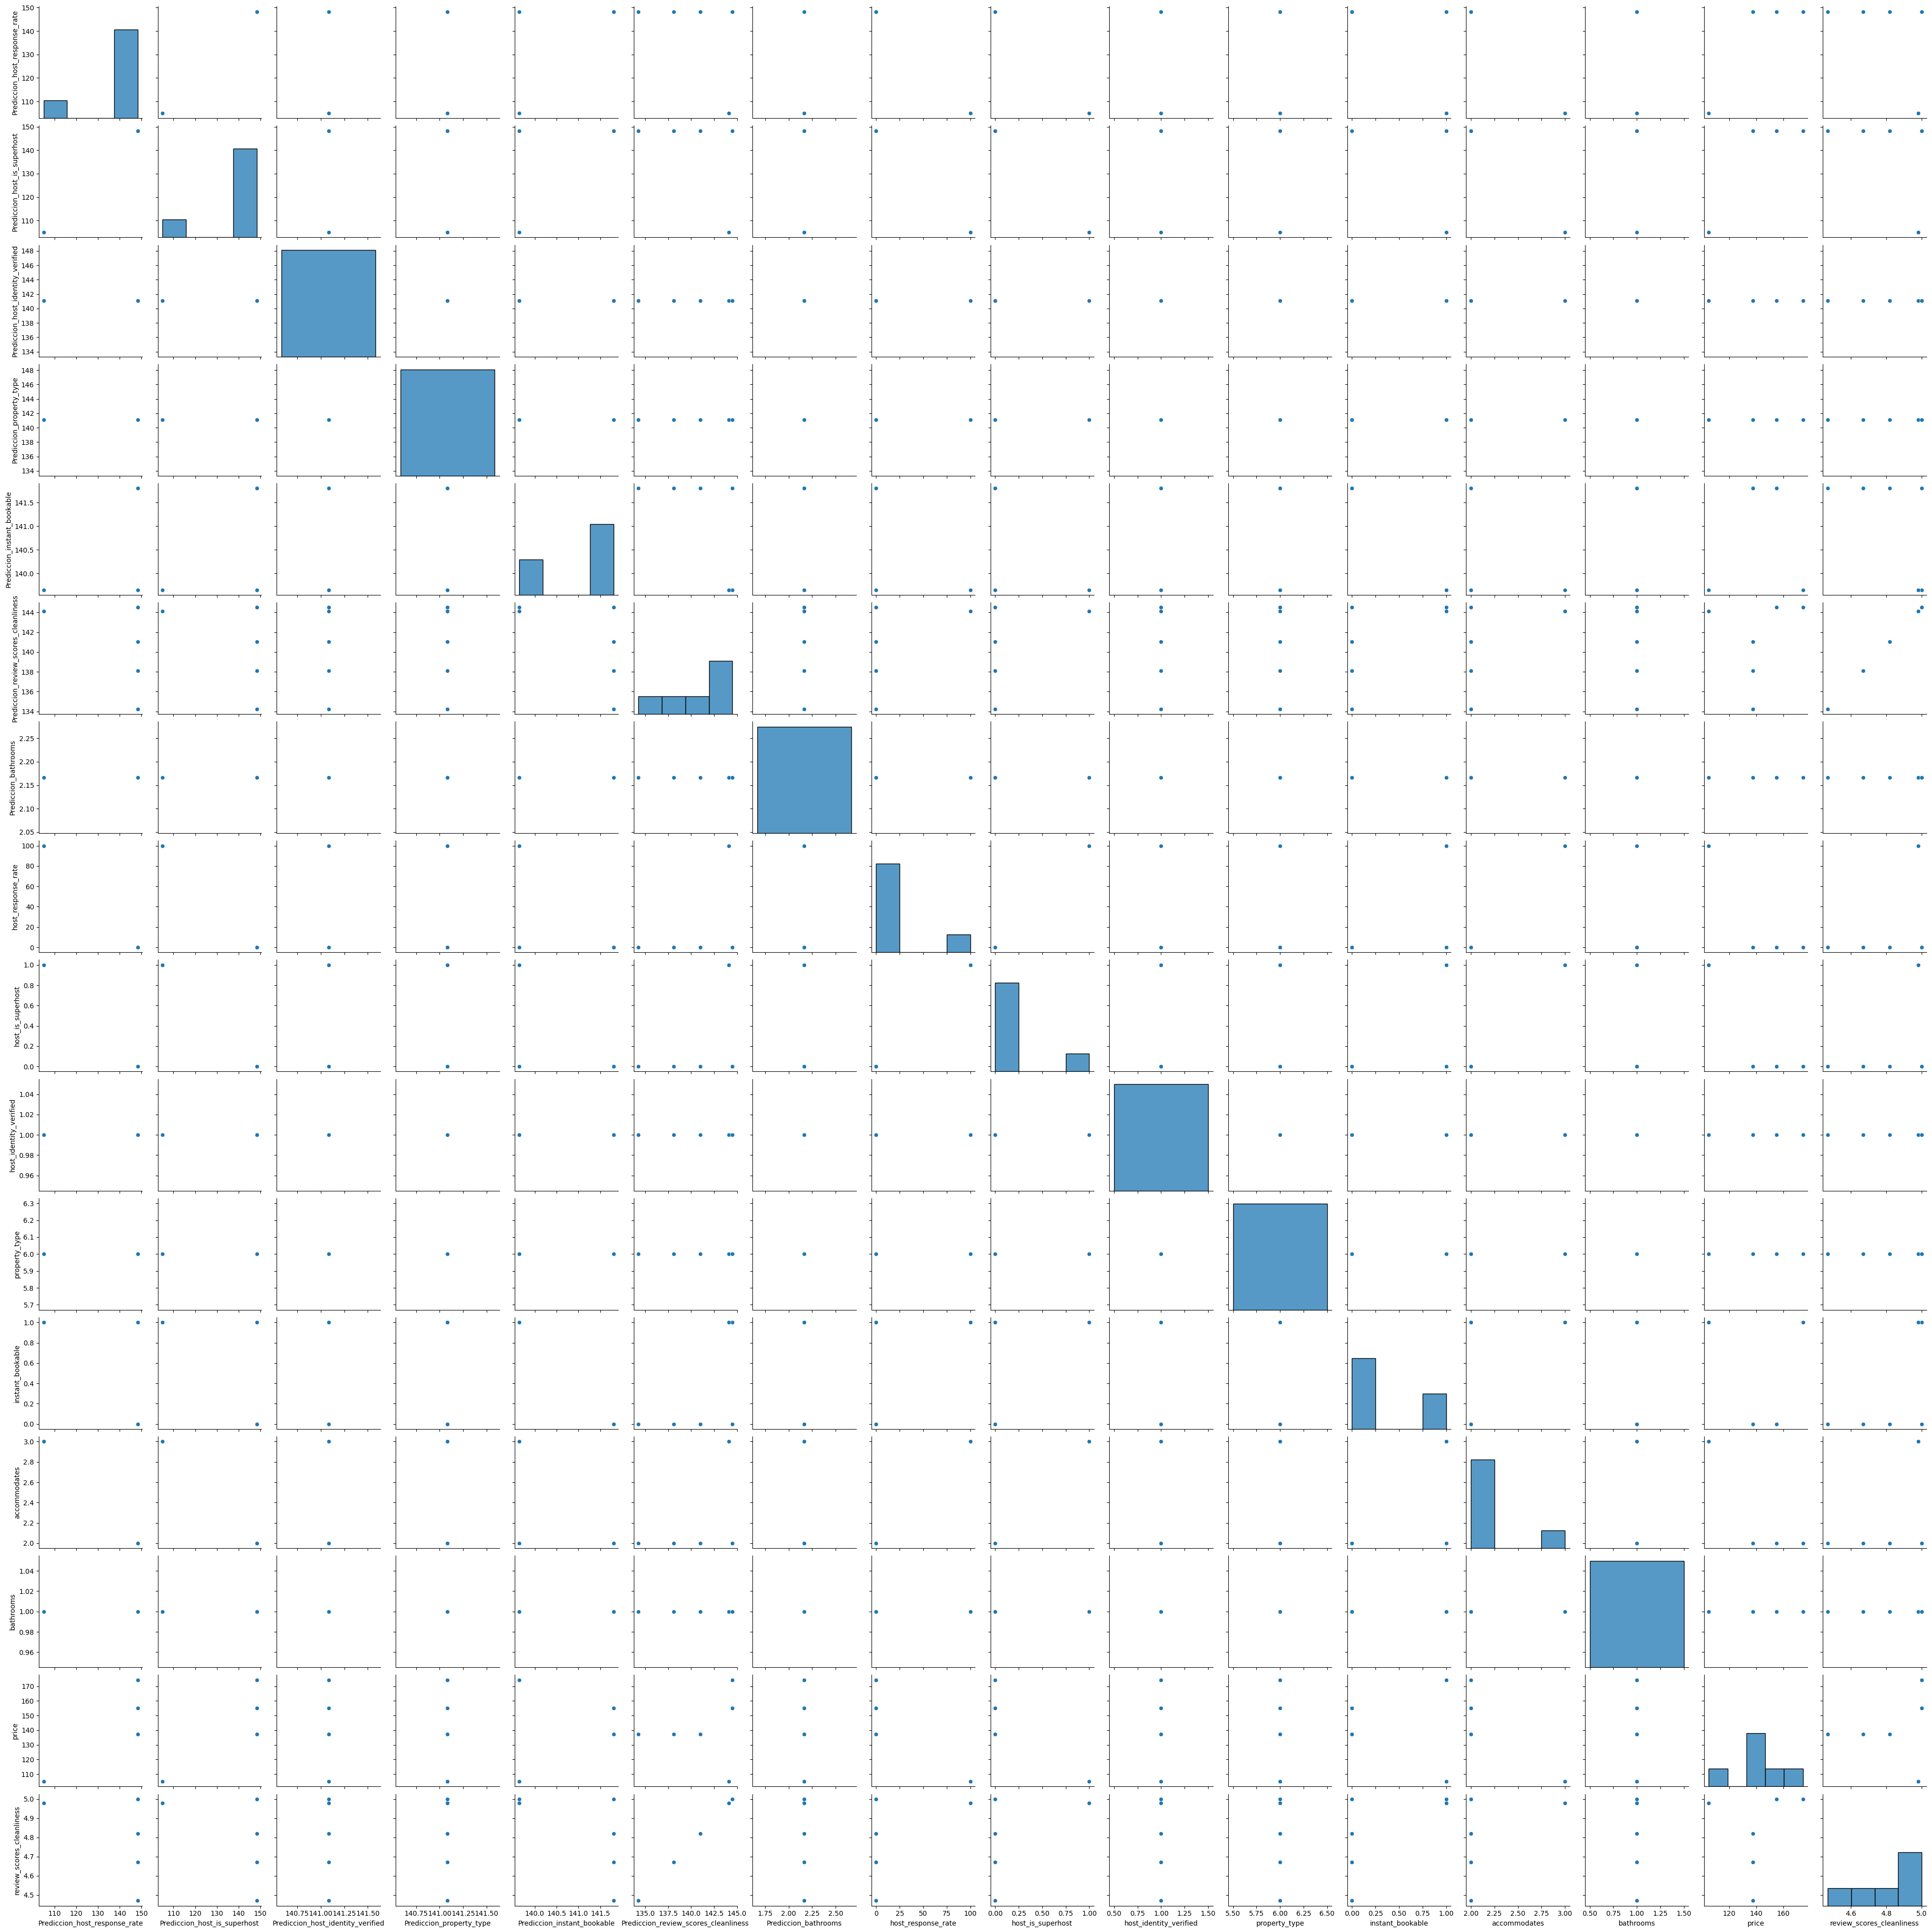

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0      5
100.0    1
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,1.000000,NaN,NaN,0.632456,-0.353774,NaN,-1.000000,-1.000000,NaN,NaN,-0.632456,-1.000000,NaN,0.769339,-0.353774
Prediccion_host_is_superhost,1.000000,1.000000,NaN,NaN,0.632456,-0.353774,NaN,-1.000000,-1.000000,NaN,NaN,-0.632456,-1.000000,NaN,0.769339,-0.353774
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_instant_bookable,0.632456,0.632456,NaN,NaN,1.000000,-0.595069,NaN,-0.632456,-0.632456,NaN,NaN,-1.000000,-0.632456,NaN,0.048320,-0.595069
Prediccion_review_scores_cleanliness,-0.353774,-0.353774,NaN,NaN,-0.595069,1.000000,NaN,0.353774,0.353774,NaN,NaN,0.595069,0.353774,NaN,0.182647,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,-1.000000,-1.000000,NaN,NaN,-0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,-0.769339,0.353774
host_is_superhost,-1.000000,-1.000000,NaN,NaN,-0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,-0.769339,0.353774
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,1.000000,NaN,NaN,0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,0.769339,0.353774
Prediccion_host_is_superhost,1.000000,1.000000,NaN,NaN,0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,0.769339,0.353774
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_instant_bookable,0.632456,0.632456,NaN,NaN,1.000000,0.595069,NaN,0.632456,0.632456,NaN,NaN,1.000000,0.632456,NaN,0.048320,0.595069
Prediccion_review_scores_cleanliness,0.353774,0.353774,NaN,NaN,0.595069,1.000000,NaN,0.353774,0.353774,NaN,NaN,0.595069,0.353774,NaN,0.182647,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,1.000000,1.000000,NaN,NaN,0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,0.769339,0.353774
host_is_superhost,1.000000,1.000000,NaN,NaN,0.632456,0.353774,NaN,1.000000,1.000000,NaN,NaN,0.632456,1.000000,NaN,0.769339,0.353774
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

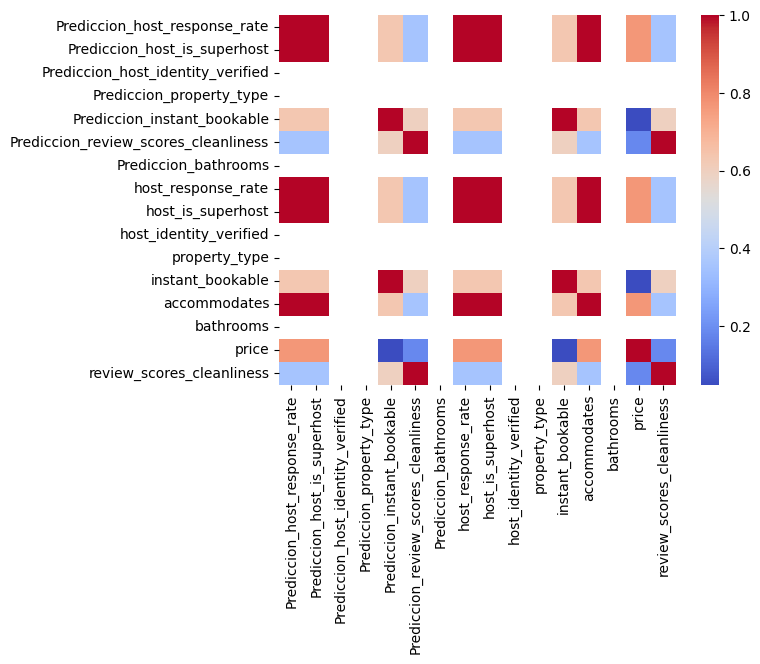

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

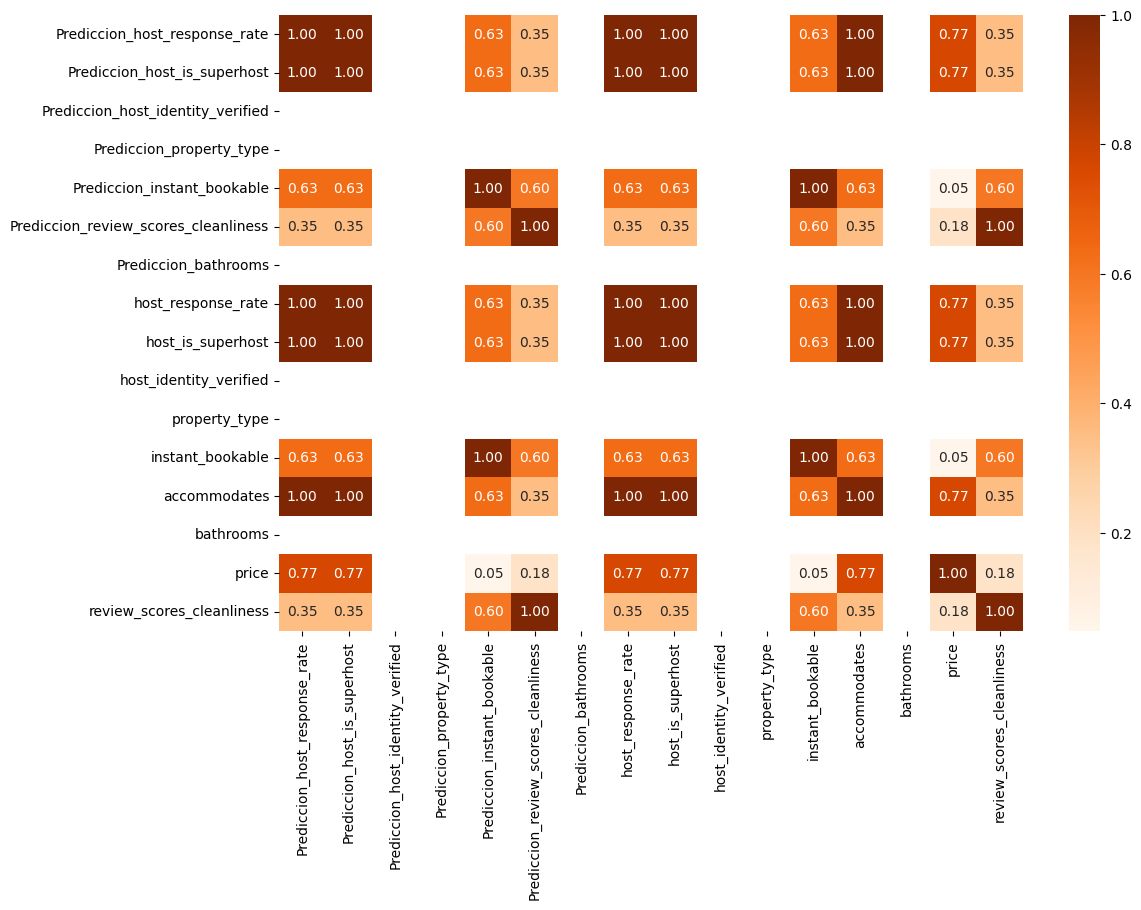

In [74]:
#mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R2
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados 
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

#Muestra las tres mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las variables con mayor correlación son:
host_response_rate: R² = 0.5919
host_is_superhost: R² = 0.5919
review_scores_cleanliness: R² = 0.0334
